In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
df = pd.read_csv('hw3.csv')

In [3]:
df['ts']=pd.to_datetime(df['ts'])

## Check out and visualize the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2667 non-null   datetime64[ns]
 1   open       2667 non-null   float64       
 2   high       2163 non-null   float64       
 3   low        2378 non-null   float64       
 4   close      2531 non-null   float64       
 5   volume     2667 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2667 non-null   object        
 8   chain      2667 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 187.6+ KB


In [5]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [6]:
df.loc[df['token'].isnull()]

,ts,open,high,low,close,volume,volumeUSD,token,chain


There is no line without token

In [7]:
df['chain'].value_counts()

ETH     1663
BTC      337
SOL      334
USDT     333
Name: chain, dtype: int64

In [8]:
chains=['ETH','BTC','SOL','USDT']

In [9]:
df.duplicated().sum()

307

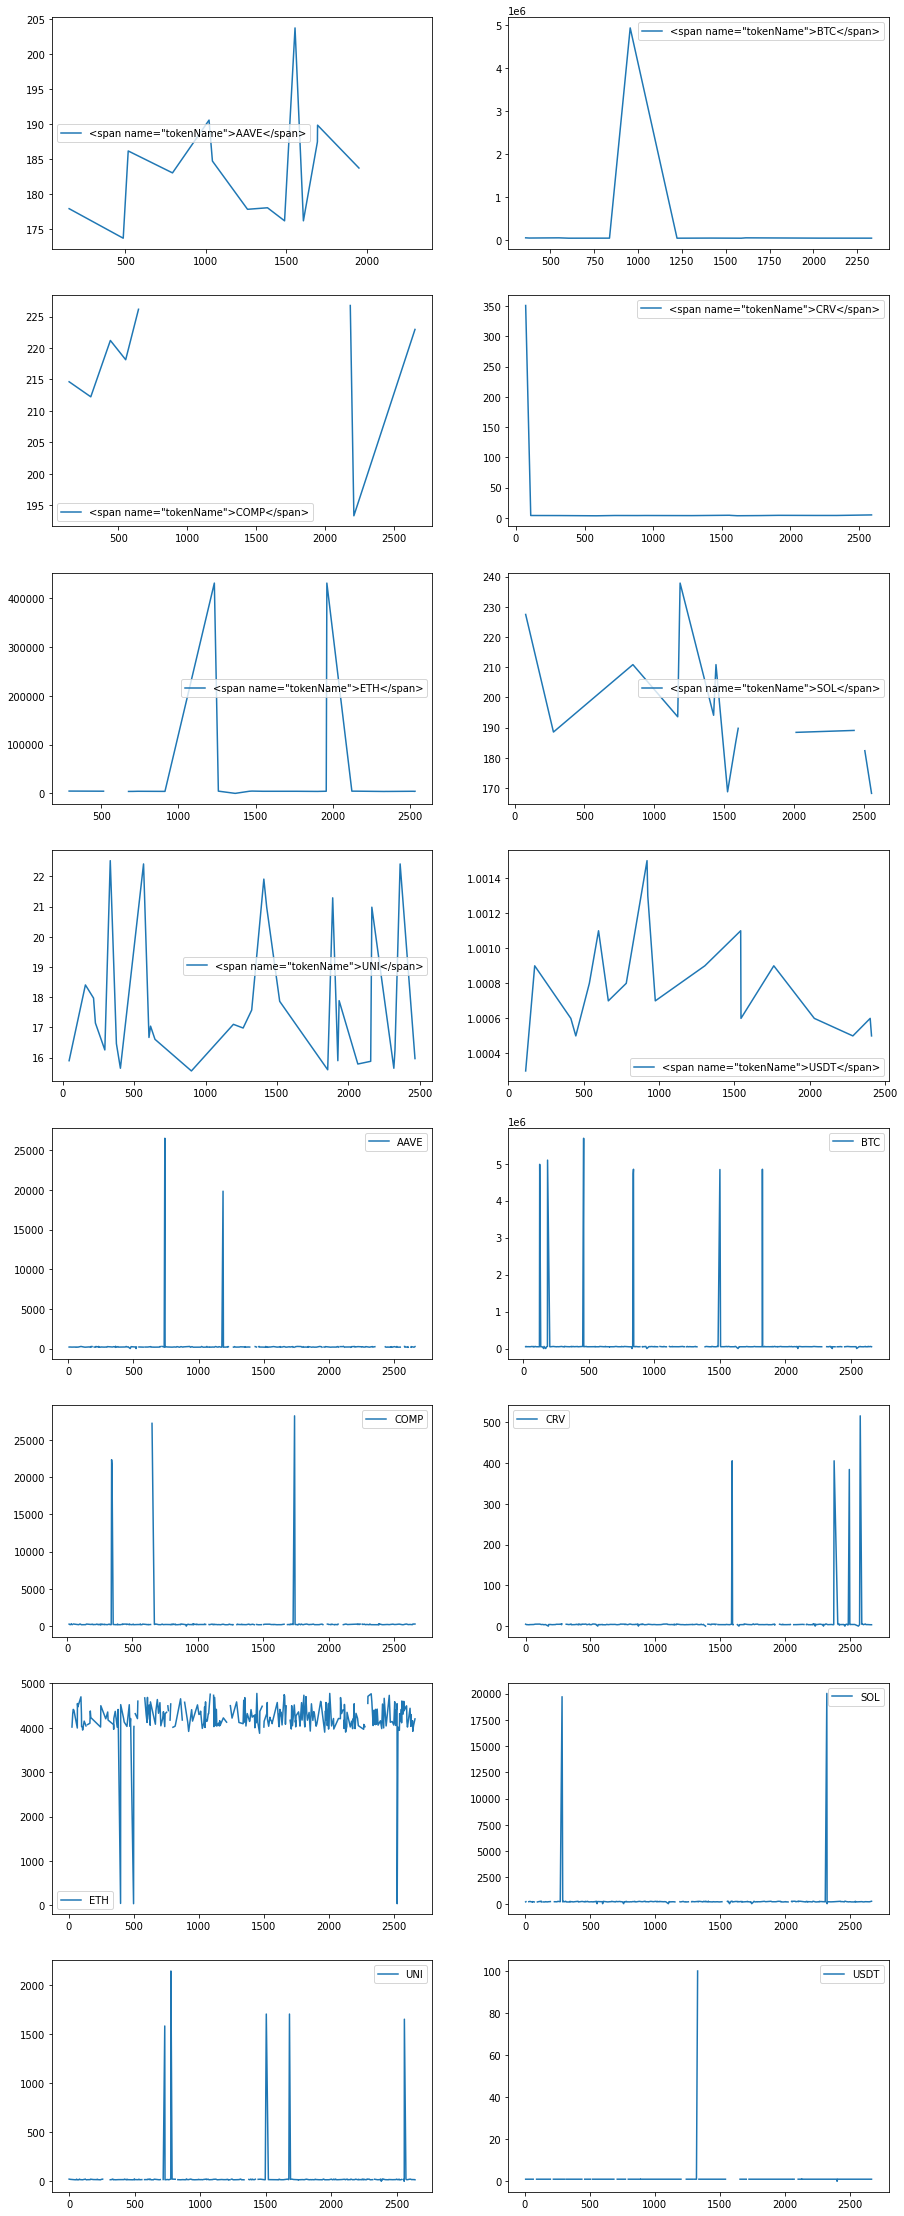

In [10]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


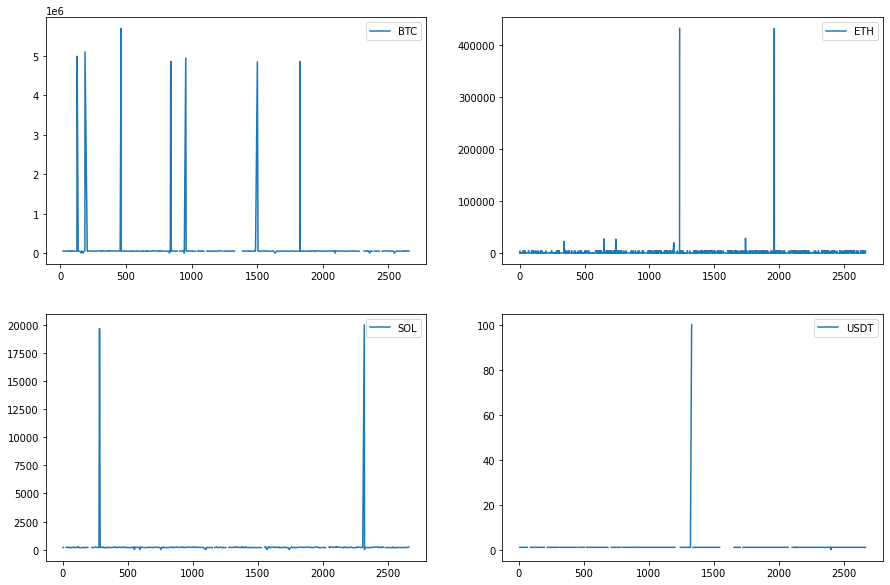

In [11]:
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'close']].groupby('chain'):
    df_chain['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1


## 1- Drop duplicates

In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2360 non-null   datetime64[ns]
 1   open       2360 non-null   float64       
 2   high       1910 non-null   float64       
 3   low        2104 non-null   float64       
 4   close      2244 non-null   float64       
 5   volume     2360 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2360 non-null   object        
 8   chain      2360 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 184.4+ KB


In [13]:
df.duplicated().sum()

0

In [14]:
df['token'].value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
UNI                                   270
ETH                                   270
<span name="tokenName">UNI</span>      25
<span name="tokenName">ETH</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

## 2- Format token names and clear tokens

In [15]:
df['token']=df['token'].str.replace('<span name="tokenName">', '')
df['token']=df['token'].str.replace('</span>', '')

In [16]:
df.token.value_counts()

UNI     295
CRV     295
SOL     295
ETH     295
AAVE    295
USDT    295
COMP    295
BTC     295
Name: token, dtype: int64

In [17]:
df.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

In [18]:
df.chain.unique()

array(['ETH', 'SOL', 'USDT', 'BTC'], dtype=object)

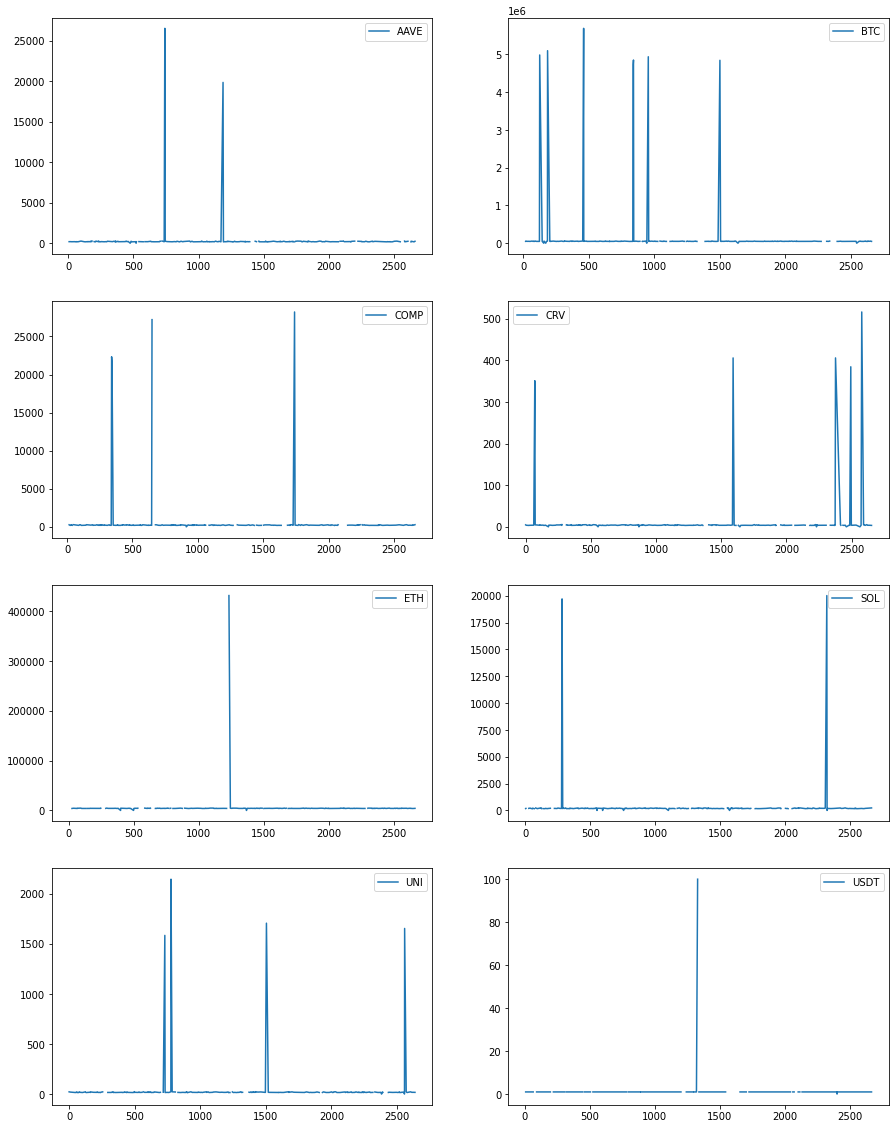

In [19]:
tokens_in_df = df.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], x='ts', y=['close'], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1
    

## 3- Check if token is related to its real chain, otherwise remove it 

In [20]:
for i in chains : 
    print(df.token[df['chain']==f'{i}'].value_counts())

UNI     295
CRV     295
ETH     295
AAVE    295
COMP    295
Name: token, dtype: int64
BTC    295
Name: token, dtype: int64
SOL    295
Name: token, dtype: int64
USDT    295
Name: token, dtype: int64


In [21]:
len(df.ts.unique())

295

Everything looks ok

As ETH chain is composed here by 5 tokens. The number of observations we get seems good and fit perfectly with the Timestamp

## 4 - Let's find a solution for missing close prices and outliers

We want to use the heuristic doing 0.5* high + 0.5 * low

In [22]:
df.close.isnull().value_counts()

False    2244
True      116
Name: close, dtype: int64

We have 116 values missings from close

In [23]:
df.low.isna().value_counts()

False    2104
True      256
Name: low, dtype: int64

In [24]:
df.high.isna().value_counts()

False    1910
True      450
Name: high, dtype: int64

However, some high and low are missing...

In [25]:
len(df.loc[df.close / df.open >= 2])

26

In [26]:
len(df.loc[df.close / df.open <= 0.5])

27

We use the heuristic

In [27]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [28]:
df.loc[((df['open']*2<df['close']) |((df['open']*0.1>df['close'] ))), 'close']= 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])


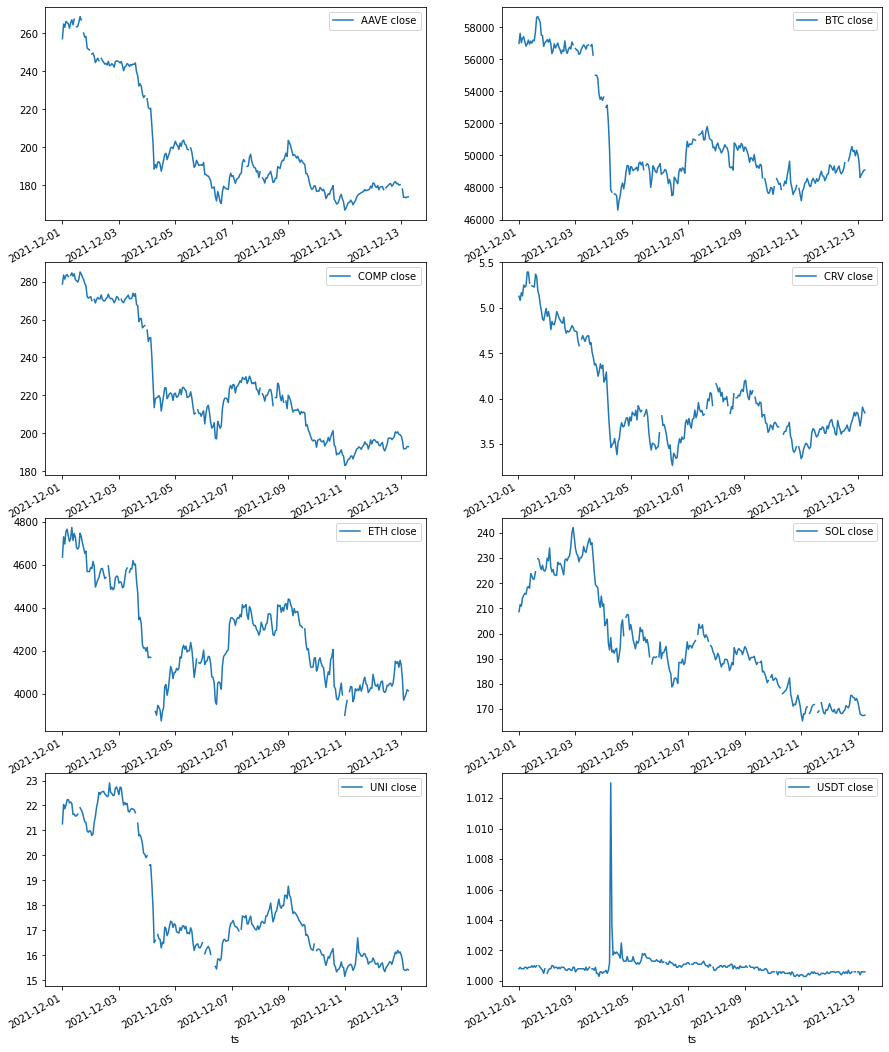

In [29]:
tokens_in_df = df.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df.groupby('token'):
    df_token.plot(ax=axes[idx//2,idx%2],x='ts',y=['close'],label=[f'{label} close'])
    axes[idx // 2, idx % 2].legend()
    idx+=1

In [30]:
df.close.isnull().value_counts()

False    2274
True       86
Name: close, dtype: int64

As we can see, it is way better : we do not have outliers anymore but some close values are still missing as we can see on the plot

## 5 - Dealing with missing close prices with forward file

We can forward file high and low to get the close values we are looking for with the same previous method

In [31]:
dft=df.sort_values(['token','ts'])

In [32]:
dft.low.fillna(method='ffill',inplace=True)
dft.high.fillna(method='ffill',inplace=True)

In [33]:
dft.loc[df['close'].isnull(), 'close'] = 0.5 * (dft.loc[df['close'].isnull(), 'high'] + dft.loc[df['close'].isnull(), 'low'])

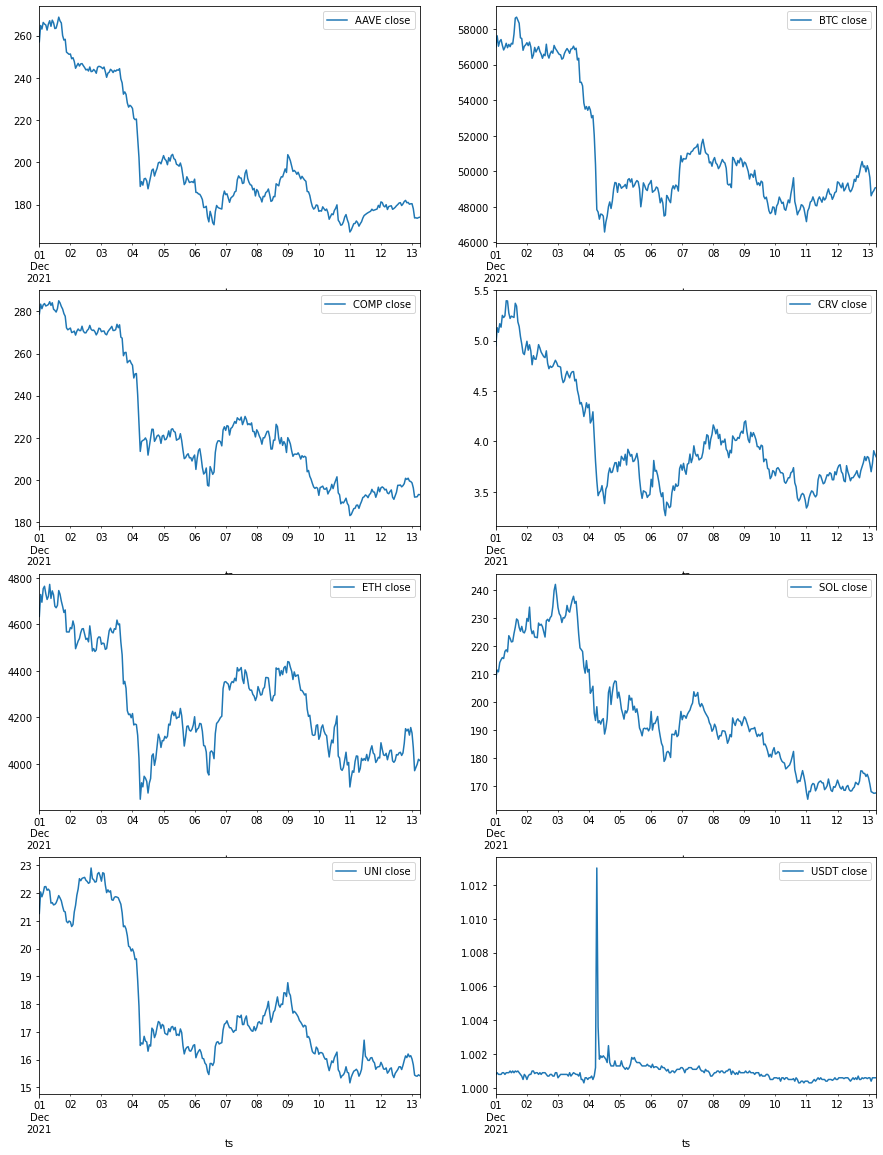

In [34]:
tokens_in_dft = dft.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_dft.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_dft.size / 2)))

idx = 0
for label, dft_token in dft.groupby('token'):
    dft_token.plot(ax=axes[idx//2,idx%2],x='ts',y=['close'],label=[f'{label} close'])
    axes[idx // 2, idx % 2].legend()
    idx+=1

## 6- Checking the volumes

In [35]:
dft.groupby('token').volume.describe()

,count,mean,std,min,25%,50%,75%,max
token,,,,,,,,
AAVE,295.0,2.476833e+03,2.140334e+03,211.370000,1.075120e+03,1.887241e+03,3.260214e+03,1.967173e+04
BTC,295.0,7.325131e+02,6.414007e+02,123.274547,3.725993e+02,5.997916e+02,9.170304e+02,8.420715e+03
COMP,295.0,1.127124e+03,1.136558e+03,67.178000,5.054475e+02,8.008490e+02,1.330281e+03,1.090076e+04
CRV,295.0,2.598646e+05,2.207889e+05,27331.120000,1.083501e+05,1.987111e+05,3.415790e+05,1.901496e+06
ETH,295.0,1.032128e+04,8.898282e+03,1344.134433,4.974579e+03,8.228093e+03,1.250400e+04,9.709742e+04
SOL,295.0,6.986882e+04,4.901993e+04,10545.390000,4.212083e+04,5.961799e+04,8.389977e+04,5.342121e+05
UNI,295.0,5.536210e+04,5.304716e+04,3836.192943,2.693908e+04,4.238081e+04,7.009919e+04,6.543789e+05
USDT,295.0,3.412913e+06,3.402121e+06,248076.490000,1.820757e+06,2.628158e+06,3.752916e+06,3.282850e+07


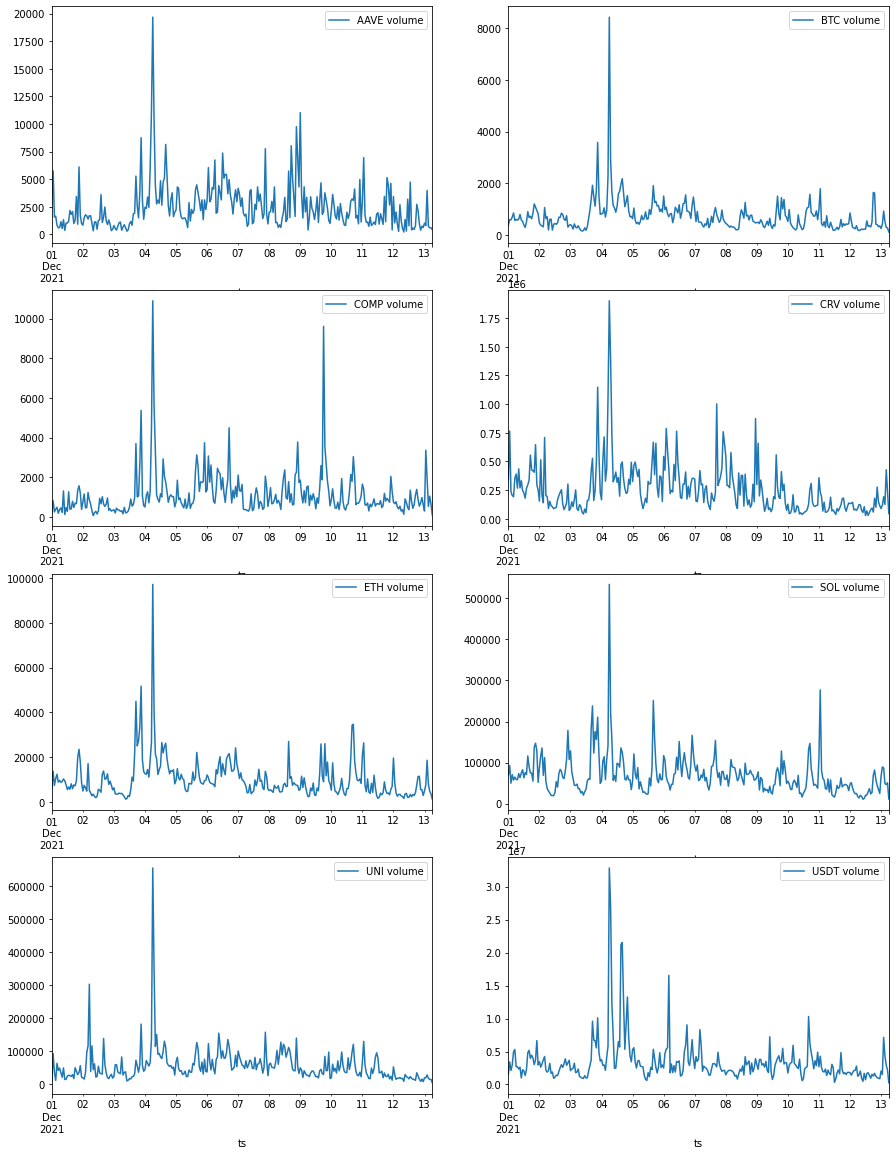

In [36]:
tokens_in_dft = dft.token.unique()
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_dft.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_dft.size / 2)))

idx = 0
for label, dft_token in dft.groupby('token'):
    dft_token.plot(ax=axes[idx//2,idx%2],x='ts',y=['volume'],label=[f'{label} volume'])
    axes[idx // 2, idx % 2].legend()
    idx+=1

Volume looks relevant with similar trending activities between tokens

## 7- Final Analysis on volumeUSD

In [37]:
dft.volumeUSD=dft.volume * dft.close

In [38]:
df_final=dft.groupby(['ts','chain'])['volumeUSD'].sum().to_frame().reset_index()
df_final

,ts,chain,volumeUSD
0,2021-12-01 00:00:00,BTC,2.213880e+07
1,2021-12-01 00:00:00,ETH,3.057435e+07
2,2021-12-01 00:00:00,SOL,1.461392e+07
3,2021-12-01 00:00:00,USDT,1.589673e+06
4,2021-12-01 01:00:00,BTC,3.455784e+07
...,...,...,...
1175,2021-12-13 05:00:00,USDT,2.180062e+06
1176,2021-12-13 06:00:00,BTC,6.051271e+06
1177,2021-12-13 06:00:00,ETH,5.721253e+06
1178,2021-12-13 06:00:00,SOL,1.876120e+06


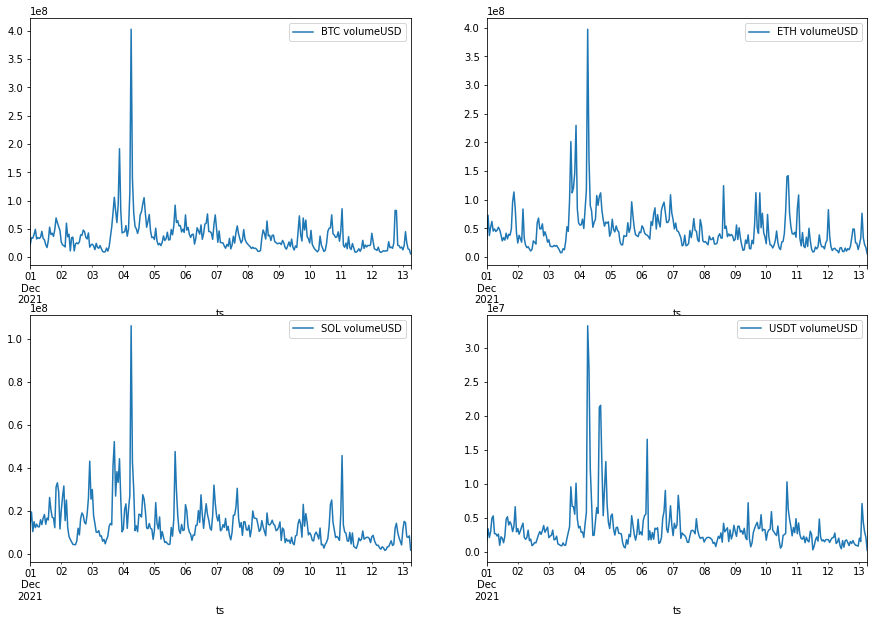

In [42]:
chain_in_dft = df.chain.unique()
fig, axes = plt.subplots(nrows=math.ceil(chain_in_dft.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chain_in_dft.size / 2)))

idx = 0
for label, df_chain in df_final.groupby('chain'):
    df_chain.plot(ax=axes[idx//2,idx%2],x='ts',y=['volumeUSD'],label=[f'{label} volumeUSD'])
    axes[idx // 2, idx % 2].legend()
    idx+=1

In [750]:
dft.groupby('chain')['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.095938e+10
ETH,1.365277e+10
SOL,4.076604e+09
USDT,1.008247e+09
